In [1]:
from scipy.optimize import curve_fit
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
def load(f):
    a = np.loadtxt(f, dtype=float)
    return a
def plot(a,x_n='x-axis',y_n='y-axis',head='plot'):
    x=a[:,0]
    y=a[:,1]
    plt.plot(x,y,color='b')
    plt.xlabel(x_n)
    plt.ylabel(y_n)
    plt.title(head)

* **The required libraries and packages are imported.**
* **The load function is defined such that it returns the numpy array from the file.**
* **The plot function is defined such that it plots the given dataset.**

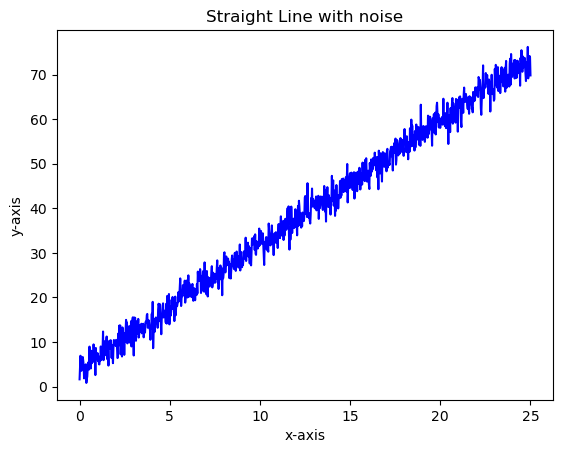

In [2]:
def stline(x, m, c):
    return m * x + c
a=load("stline.txt")
plot(a,head='Straight Line with noise')

**The given dataset with noise is plotted, which comes out to be a straight line with noise.**

44 µs ± 641 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
The estimated equation is 2.791124245414917 t + 3.848800101430743


Text(0.5, 1.0, 'Straight Line using least square')

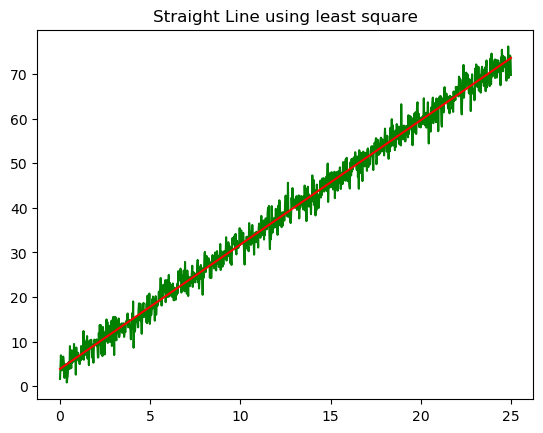

In [3]:
x=a[:,0]
y=a[:,1]
M = np.column_stack([x, np.ones(len(a))])
(p1, p2), _, _, _ = np.linalg.lstsq(M, y, rcond=None)
%timeit np.linalg.lstsq(M, y, rcond=None)
print(f"The estimated equation is {p1} t + {p2}")
y_p=stline(x,p1,p2)
n=p1*x+p2-y

plt.plot(x,y,color='g')
plt.plot(x,y_p,color='r')
plt.title('Straight Line using least square')
#plt.errorbar(x,y,np.mean(n), fmt='g')
#plt.plot(x,y,color='r')

* **The x and y values are extracted from the dataset.**
* **Then `np.linalg.lstsq()` is used to find the best fit using the least square error method, for which the inputs are provided in the form of M and y.**
* **The estimate curve is then plotted against the given noisy dataset, to check for accuracy, which turns out to be fairly good.**
* **The accuracy part can be roughly estimated from looking at the errorbar plot, which when superimposes the fitted curve, implies the curve is very well fit.**
* **The length of each error bar, stored in list n has been approximated to be the difference between the given value and fitted curve's value.**

Text(0.5, 1.0, 'Curve fit with error bars')

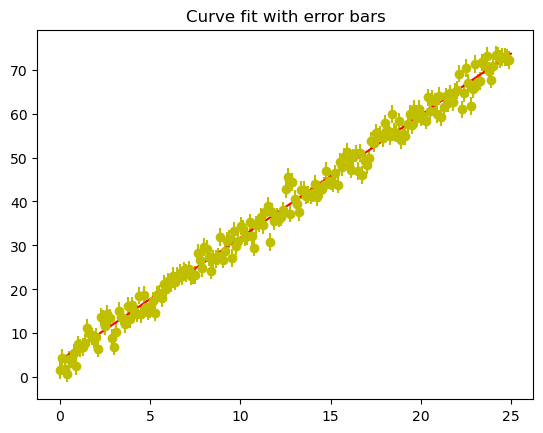

In [4]:
plt.errorbar(x[::5], y[::5],np.std(n), fmt='yo')
plt.plot(x,y_p,color='r')
plt.title('Curve fit with error bars')

405 µs ± 8.69 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
The estimated equation is 2.791124245414917 t + 3.848800101430743


Text(0.5, 1.0, 'Straight Line using curve fitting')

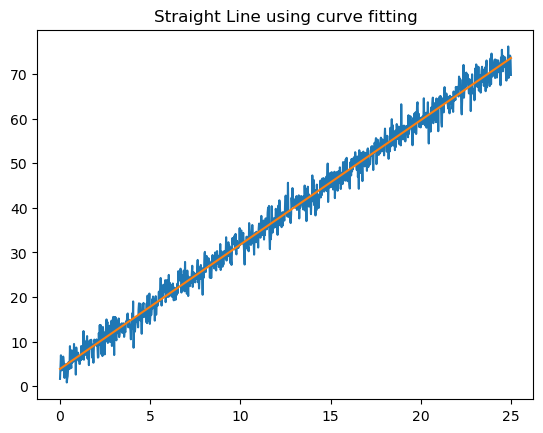

In [5]:
def nlfunc(t,p1,p2):
    return p1*t+p2
(zp1, zp2), pcov = curve_fit(nlfunc,x,y)
%timeit curve_fit(nlfunc,x,y)
y_p1=stline(x,zp1,zp2)
print(f"The estimated equation is {p1} t + {p2}")
plt.plot(x,y,x,y_p1)
plt.title('Straight Line using curve fitting')

* **The curve is then fit using `curve_fit()` function, which predicts the values of the parameters provided.**
* **We observe the same plot in both cases - a straight line with slope m = 2.791124245414917 and intercept c = 3.848800101430743.**
* **y = 2.791124245414917 x + 3.848800101430743.**
* **The time taken by `np.linalg.lstsq()` is less than that taken by `curve_fit`, for the straight line case specifically, implying least squares method is more efficient than curve fit method for predicting the straight line.**

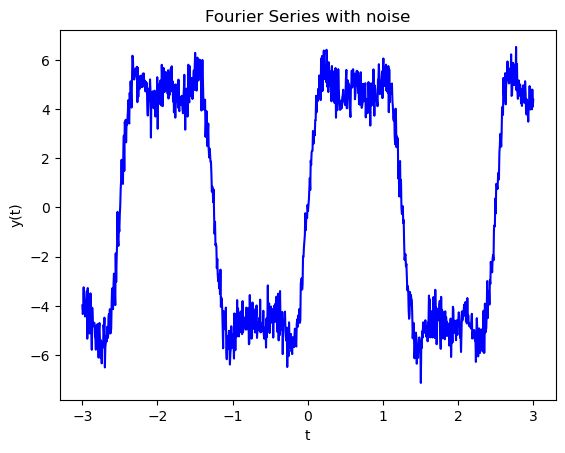

In [6]:
def fourier(t,p2,p3,p4,p5,p6,p7):
    return p3*np.sin(p2*t)+p5*np.sin(p4*p2*t)+p7*np.sin(p6*p2*t)
a=load("fourier.txt")
plot(a,head='Fourier Series with noise',x_n='t',y_n='y(t)')

* **The given dataset is plotted, which turns out to be a sum of sine waves of different frequencies with noise.**

[2.51358514 6.01516905 3.0030482  1.99721026 4.9853702  0.97772014]


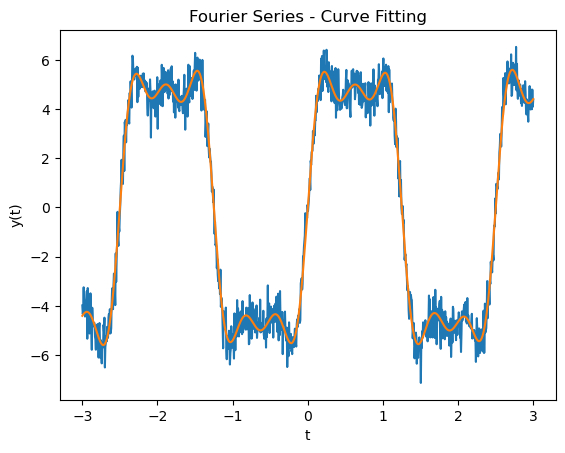

In [7]:
x=a[:,0]
y=a[:,1]
args, _ = curve_fit(fourier,x,y,maxfev=18000,p0=[2.5,1,3,1,5,1])
(zp2,zp3,zp4,zp5,zp6,zp7)=args
y_p1=fourier(x,zp2,zp3,zp4,zp5,zp6,zp7)
plt.plot(x,y,x,y_p1)
plt.title('Fourier Series - Curve Fitting')
plt.xlabel('t')
plt.ylabel('y(t)')
print(args)

* **The graph is then fit using curve_fit() using the parameters predicted. The initial guesses for each variables were made randomly and arrived at the respective correct values.**
* **The above plot can also be fitted by importing `rfft` and `rfftfreq` from `scipy.fft` to get the corresponding frequencies.**
* **The function turns out to be y= 6.01516906 sin(2.51358514 x) + 1.99721026 sin(3.0030482 * 2.51358514 x ) + 0.97772013 sin(4.9853702 * 2.51358514 x).**

Text(0.5, 1.0, 'Curve fit with error bars')

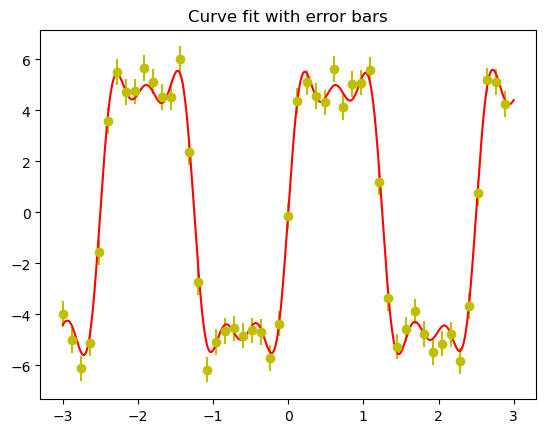

In [8]:
n=y_p1-y
plt.errorbar(x[::20], y[::20],np.std(n), fmt='yo')
plt.plot(x,y_p1,color='r')
plt.title('Curve fit with error bars')

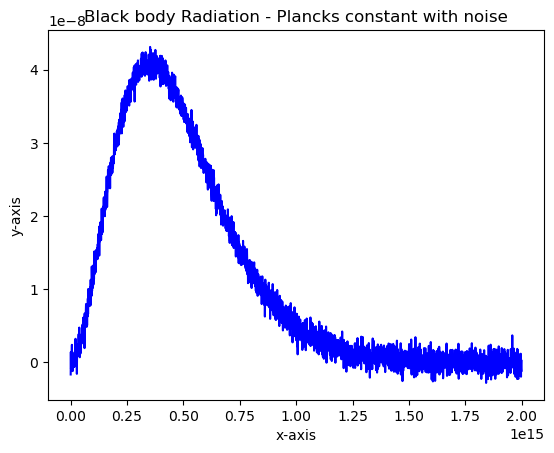

In [9]:
def plancks(f, h, T):
    c = 3*(10**8)
    k = 1.38*(10**(-23))
    return (2*h*(f**3)/c**2)/(np.exp(h*f/(k*T)) - 1)
a=load("planck.txt")
plot(a,head='Black body Radiation - Plancks constant with noise')

* **The given dataset is plotted, which turns out to be a characteristic curve of black-body radiation, i.e B(f,T) vs f with added noise (inaccuracies).** 
* **Planck's Law : $$B _{\lambda}(T) =  \frac{2hv^3}{c^2} \cdot \frac{1}{e^\frac{hf}{kT} - 1}$$**

6.6432297851565105e-34 6011.361538784804


Text(0.5, 1.0, 'Plancks constant - Curve Fitting')

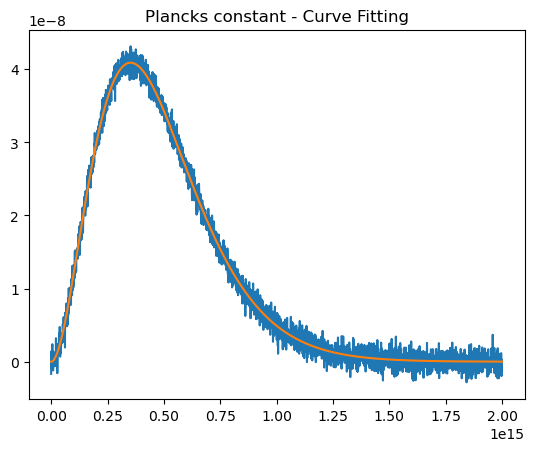

In [10]:
x=a[:,0]
y=a[:,1]
(h, T),_ = curve_fit(plancks, x, y, p0 = [6e-34,2000])
print(h,T)
y_p2=plancks(x, h, T)
plt.plot(x,y,x,plancks(x, h, T))
plt.title('Plancks constant - Curve Fitting')

Text(0.5, 1.0, 'Curve fit with error bars')

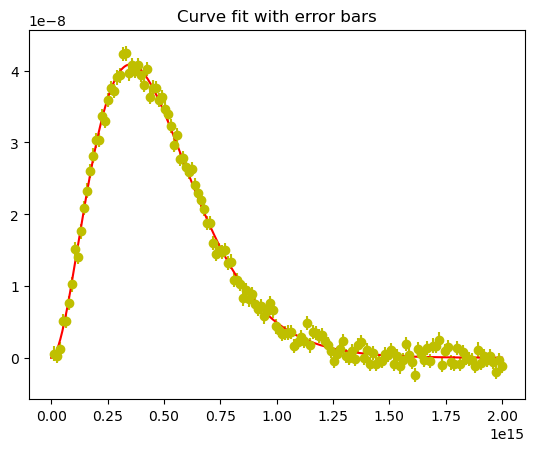

In [11]:
n=y_p2-y
plt.errorbar(x[::20],y[::20],np.std(n), fmt='yo')
plt.plot(x,y_p2,color='r')
plt.title('Curve fit with error bars')

* **The given dataset is plotted, along with the curve which is predicted by predicting the values of h (plancks constant) and T (tempertaure).** 
* **The parameter p0 refers to the list of initial values for the corresponding variables to start the prediction with. In `curve_fit`, the initial value of the parameters will be 1 when an initial guess isn not made. Because of this, the value inside `exp()` crosses the permitted value and an overflow error has occurred.**
* **Here, h value is initialised to 6e-34, which is roughly the value of plancks constant, and the corresponding temperature which can be calculated from the plancks law. Here, the intial guess for T is given as 2000.**
* **The predicted values are h=6.6432297851565105e-34 and T=6.6432297851565105e-34 K.**

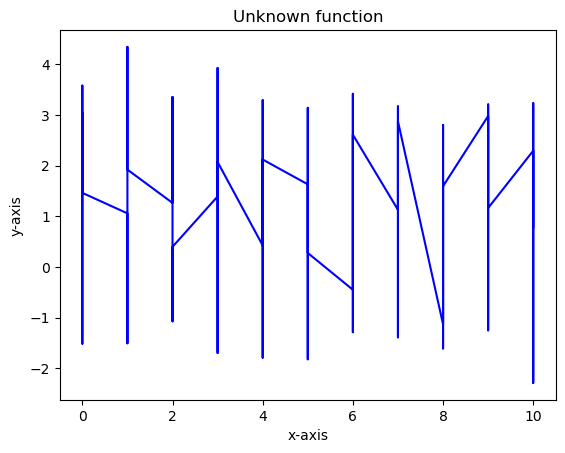

In [12]:
a=load("unknown.txt")
plot(a,head= 'Unknown function')

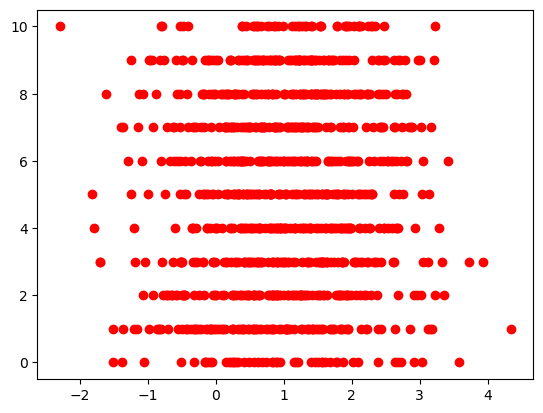

In [13]:
x=a[:,0]
y=a[:,1]
plt.plot(y,x,'ro')

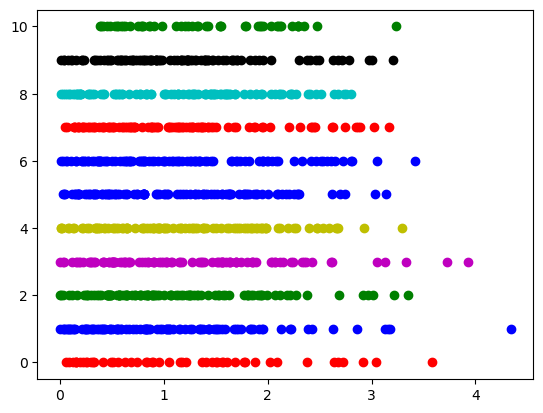

In [14]:
d={}
for i in range(11):
    d[i]=[]
for i in range(len(x)):
    for j in d:
        if x[i]==j:
            d[j].append([x[i],y[i]])
for i in d:
    d[i]=np.array(d[i])
d2={0:'r',1:'b',2:'g',3:'m',4:'y',5:'b',6:'b',7:'r',8:'c',9:'k',10:'g'}
for i in d.values():
    plt.plot(abs(i[:,1]),(i[:,0]),d2[i[0][0]]+'o')      

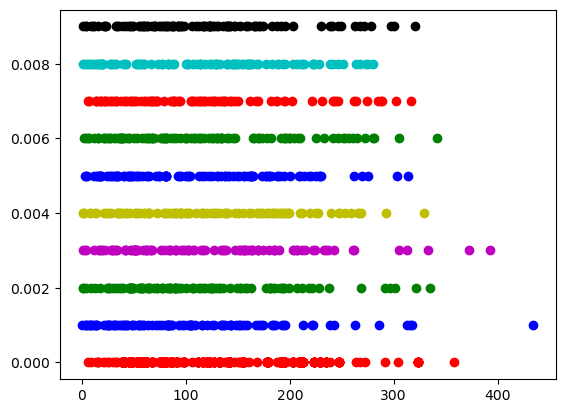

In [15]:
d={}
for i in range(10):
    d[i]=[]
for i in range(len(x)):
    for j in d:
        if x[i]==j:
            d[j].append([x[i],y[i]])
        if x[i]==10:
            d[0].append([0,y[i]])
for i in d:
    d[i]=np.array(d[i])
d2={0:'r',1:'b',2:'g',3:'m',4:'y',5:'b',6:'g',7:'r',8:'c',9:'k'}
for i in d.values():
    plt.plot(abs(100*i[:,1]),0.001*(i[:,0]),d2[i[0][0]]+'o')

* **The above plots were done to find any pattern or specific function, but due to time constraints, wasnt able to get the exact function.**

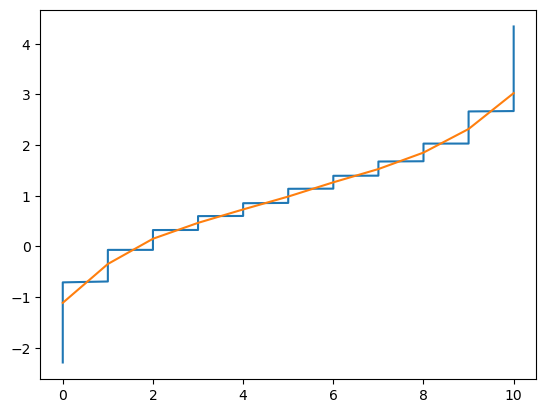

In [16]:
y=np.sort(y)
k=[]
for i in [0,50,150,250,350,450,550,650,750,850,950]:
    if i==0 or i==950:
        l= y[i:i+50]
        k.append(np.mean(l))
    else:
        l=y[i:i+100]
        k.append(np.mean(l))


p=np.arange(0,11,1)

plt.plot(x,y,p,k)

* **The above plot is obtained by sorting the y values and plotting the graph by distributing the points.**
* **The plot is then roughly estimated to be the cdf function between two different limits.**
* **$\phi(z) = \frac{1}{\sqrt{2\pi}} e^{\frac{-(z-\mu)^2}{2\sigma^2}}$**
* **The values of $\mu$ and $\sigma$ , i.e mean and standard deviation can be predicted by curve fit methods.**